# WeatherPy - Tyler Hill

In [2]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [3]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
lons = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 1800

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, lon)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    city_country = f'{f_city}, {f_country}'
    if city_country not in cities:
        cities.append(city_country)
# Display number of cities collected
print(f'{len(cities)} unique cities collected')

703 unique cities collected


In [7]:
# Lists to store new Latitudes and Longitudes for each city + city name
city = []
c_lats = []
c_lons = []

# Loop through cities list, trying to gather weather data for each city
for i, response in enumerate(cities):
    # Building URL and json() response for each iteration
    q_url = f'{url}&units={units}&q={cities[i]}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    # Try to collect data from weather API and append to respective lists
    try:
        # Collect values for each variable
        temp = response["main"]["temp"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        latc = response["coord"]["lat"]
        lonc = response["coord"]["lon"]
        
        # Append variables to lists
        c_lats.append(latc)
        c_lons.append(lonc)
        city.append(cities[i])
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        
        # Print city and index number for each successful data retrieval
        print(f'[{i}]: {cities[i]}')
        
    # Skip any cities that encounter error or have incomplete data
    except:
        print("Error Retrieving Data, skipping...")
        pass
print("-----------------------")
print("Data retrieval complete")
print(f'Data retrieved for {len(city)} cities')

[0]: Pangai, TO
[1]: Bengkulu, ID
[2]: Hambantota, LK
[3]: Kaoma, ZM
Error Retrieving Data, skipping...
[5]: Carnarvon, AU
[6]: Mehamn, NO
[7]: Vaini, TO
[8]: Ushuaia, AR
[9]: Albany, AU
[10]: Rikitea, PF
[11]: Bredasdorp, ZA
[12]: Inuvik, CA
[13]: College, US
[14]: Victoria, SC
[15]: Puerto Ayora, EC
Error Retrieving Data, skipping...
[17]: Punta Arenas, CL
[18]: Yeppoon, AU
[19]: Saint-Philippe, RE
[20]: Zyryanovsk, KZ
[21]: Hobart, AU
Error Retrieving Data, skipping...
[23]: Provideniya, RU
[24]: Zambezi, ZM
[25]: Arraial Do Cabo, BR
[26]: Gimli, CA
[27]: Chitrakonda, IN
[28]: Jamestown, SH
[29]: Vestmannaeyjar, IS
Error Retrieving Data, skipping...
[31]: Tuktoyaktuk, CA
[32]: Mikhaylovka, KZ
[33]: Umm Lajj, SA
[34]: Shingu, JP
[35]: Comodoro Rivadavia, AR
[36]: Guane, CU
[37]: Fort Nelson, CA
[38]: Kapaa, US
[39]: Katobu, ID
[40]: Qaanaaq, GL
[41]: Kodiak, US
Error Retrieving Data, skipping...
[43]: Jalu, LY
[44]: Busselton, AU
[45]: Chulym, RU
[46]: Caravelas, BR
[47]: Bluff, NZ
[

[375]: Boguchany, RU
[376]: Ca Mau, VN
[377]: Kurumkan, RU
[378]: San Andres, CO
[379]: Wrzesnia, PL
Error Retrieving Data, skipping...
[381]: Morehead, PG
[382]: Booue, GA
[383]: Klaksvik, FO
[384]: Tautira, PF
[385]: Nangong, CN
[386]: Oriximina, BR
[387]: Sinnamary, GF
[388]: Zihuatanejo, MX
[389]: Plettenberg Bay, ZA
[390]: Luderitz, NA
[391]: Ketchikan, US
[392]: Cayenne, GF
[393]: Port Blair, IN
Error Retrieving Data, skipping...
[395]: Tessalit, ML
[396]: Lebedinyy, RU
Error Retrieving Data, skipping...
[398]: Malanje, AO
[399]: Mazagao, BR
[400]: Samana, DO
Error Retrieving Data, skipping...
[402]: Canico, PT
[403]: Nayudupeta, IN
[404]: Camacupa, AO
Error Retrieving Data, skipping...
[406]: Nenjiang, CN
[407]: Yarada, IN
[408]: Praia, CV
[409]: Nieuw Amsterdam, SR
[410]: Ballangen, NO
[411]: Laishevo, RU
[412]: Nalut, LY
[413]: Noshiro, JP
[414]: Wencheng, CN
[415]: Daru, PG
[416]: Harindanga, IN
[417]: Juneau, US
[418]: Nelson Bay, AU
Error Retrieving Data, skipping...
[420]:

In [10]:
# Build dataframe from collected values
df = pd.DataFrame({
    "City": city,
    "Latitude": c_lats,
    "Longitude": c_lons,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,"Pangai, TO",-19.8000,-174.3500,77.81,72,100,8.43
1,"Bengkulu, ID",-3.8004,102.2655,77.02,89,99,6.76
2,"Hambantota, LK",6.1241,81.1185,81.72,79,79,2.82
3,"Kaoma, ZM",-14.7833,24.8000,67.86,68,80,5.37
4,"Carnarvon, AU",-24.8667,113.6333,68.07,83,40,3.44


In [11]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [12]:
# Declare column values for ease of use
c_lats = df["Latitude"]
c_lons = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [13]:
# Determine max and min values to determine xlim for each plot
clat_min = c_lats.min()
clat_max = c_lats.max()

# temp_min = temps.min()
# temp_max = temps.max()

# humid_min = humids.min()
# humid_max = humids.max()

# cloud_min = clouds.min()
# cloud_max = clouds.max()

# wind_min = winds.min()
# wind_max = winds.max()

# Scatter Plots

In [44]:
# Lists created to store values for plotting function
# Lists of each variable to plot
thcw = [temps, humids, clouds, winds]
# Variable strings
names = ["Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)",]
# .png output filenames
save_fig = ["Output/Images/temperature_vs_lat.png","Output/Images/humidity_vs_lat.png","Output/Images/cloudiness_vs_lat.png","Output/Images/windspeed_vs_lat.png"]
colors = ["dodgerblue","teal","cornflowerblue", "thistle"]
line_colors = ["darksalmon","darksalmon","darksalmon","lightcoral"]
# font_colors = ["tomato","dodgerblue","darksalmon","darksalmon"]
font_loc = [95,50,50,6.5]

In [47]:
# Plotting function to plot four different variables against Latitude:
# Temp, Humidity, Cloudiness, Windspeed
def plot():
    for i in range(len(thcw)):
#         plt.style.use(avail[23])
        fig = plt.scatter(c_lats, thcw[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(clat_min+2,clat_max+2)
        
        slope, int, r, p, std_err = stats.linregress(c_lats, thcw[i])
        y = slope * c_lats + int
        line = plt.plot(c_lats,y,c=line_colors[i], linewidth=2)
        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(-40,font_loc[i]),fontsize=12,color="tomato")
        plt.savefig(save_fig[i])
        
#         plt.show()
        print(f'Plot created for {names[i]} vs. Latitude')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()
        
    figure, axis = plt.subplots(2,2,figsize=(10,10))
    axis[0, 0].scatter(c_lats, thcw[0], c=colors[0])
    axis[0, 0].set_title(names[0])
    axis[0, 1].scatter(c_lats, thcw[1], c=colors[1])
    axis[0, 1].set_title(names[1])
    axis[1, 0].scatter(c_lats, thcw[2], c=colors[2])
    axis[1, 0].set_title(names[2])   
    axis[1, 1].scatter(c_lats, thcw[3], c=colors[3])
    axis[1, 1].set_title(names[3])
    
    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images folder")

Plot created for Temperature (F) vs. Latitude
      r_value = -0.59

Plot created for Humidity (%) vs. Latitude
      r_value = 0.05

Plot created for Cloudiness (%) vs. Latitude
      r_value = 0.16

Plot created for Wind Speed (mph) vs. Latitude
      r_value = -0.06

---------------------

Plotting Complete: Four plots created in /Output/Images folder


<Figure size 432x288 with 0 Axes>

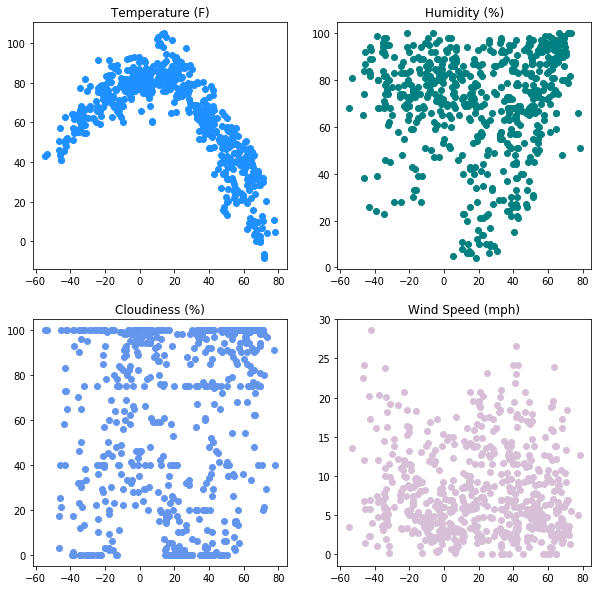

In [48]:
# Run plot function to create plots
plot()

# Separate values into Northern and Southern Hemispheres

In [49]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,"Pangai, TO",-19.8000,-174.3500,77.81,72,100,8.43,Southern
1,"Bengkulu, ID",-3.8004,102.2655,77.02,89,99,6.76,Southern
2,"Hambantota, LK",6.1241,81.1185,81.72,79,79,2.82,Northern
3,"Kaoma, ZM",-14.7833,24.8000,67.86,68,80,5.37,Southern
4,"Carnarvon, AU",-24.8667,113.6333,68.07,83,40,3.44,Southern


In [53]:
# .loc to separate into Northern and Southern Hemispheres
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [54]:
# Declaring lat, long, temp, humidity, cloudiness, windspeed values for respective hemispheres
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [55]:
# lists created to store respective hemispheres for n_plot and s_plot functions
northern = [n_temps, n_humids, n_clouds, n_winds]
southern = [s_temps, s_humids, s_clouds, s_winds]
# Output filepaths for n_plot and s_plot functions
n_save = ["Output/Images/Northern Hemisphere/temperature_vs_lat.png","Output/Images/Northern Hemisphere/humidity_vs_lat.png","Output/Images/Northern Hemisphere/cloudiness_vs_lat.png","Output/Images/Northern Hemisphere/windspeed_vs_lat.png"]
s_save = ["Output/Images/Southern Hemisphere/temperature_vs_lat.png","Output/Images/Southern Hemisphere/humidity_vs_lat.png","Output/Images/Southern Hemisphere/cloudiness_vs_lat.png","Output/Images/Southern Hemisphere/windspeed_vs_lat.png"]

In [69]:
def n_plot():
    for i in range(len(northern)):
        fig = plt.scatter(n_lats, northern[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(0,n_lats.max())

        slope, int, r, p, std_err = stats.linregress(n_lats, northern[i])
        y = slope*n_lats+int
        line = plt.plot(n_lats,y,c="r", linewidth=2)

        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(40,25),fontsize=12,color="r")

        plt.savefig(n_save[i])

#         plt.show()
        print(f'Plot created for {names[i]} vs. Latitude (Northern Hemisphere)')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

    figure, axis = plt.subplots(2,2,figsize=(12,12))

    axis[0,0].scatter(n_lats, northern[0],c=colors[0])
    axis[0,0].set_title(f'{names[0]} vs. Latitude (Northern Hemisphere)')

    axis[0,1].scatter(n_lats, northern[1],c=colors[1])
    axis[0,1].set_title(f'{names[1]} vs. Latitude (Northern Hemisphere)')

    axis[1,0].scatter(n_lats, northern[2],c=colors[2])
    axis[1,0].set_title(f'{names[2]} vs. Latitude (Northern Hemisphere)')

    axis[1,1].scatter(n_lats, northern[3],c=colors[3])
    axis[1,1].set_title(f'{names[3]} vs. Latitude (Northern Hemisphere)')

Plot created for Temperature (F) vs. Latitude (Northern Hemisphere)
      r_value = -0.88

Plot created for Humidity (%) vs. Latitude (Northern Hemisphere)
      r_value = 0.31

Plot created for Cloudiness (%) vs. Latitude (Northern Hemisphere)
      r_value = 0.26

Plot created for Wind Speed (mph) vs. Latitude (Northern Hemisphere)
      r_value = -0.05



<Figure size 432x288 with 0 Axes>

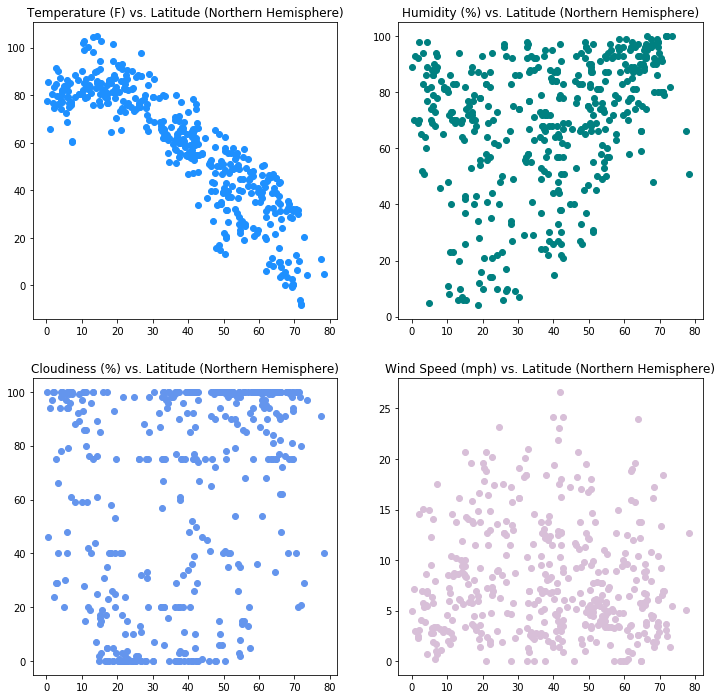

In [77]:
# Run n_plot function to plot Northern Hemisphere
n_plot()

In [78]:
font_loc2 = [70, 60, 30, 12.5]

In [79]:
def s_plot():
    for x in range(len(southern)):
        fig = plt.scatter(s_lats, southern[x], c=colors[x], marker='o')
        plt.ylabel(names[x])
        plt.xlabel('Latitude')
        plt.xlim(s_lats.min(),0)

        slope, int, r, p, std_err = stats.linregress(s_lats, southern[x])
        y = slope*s_lats+int
        line = plt.plot(s_lats,y,c="r", linewidth=2)

        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(-40,font_loc2[x]),fontsize=12,color="r")
        plt.savefig(s_save[x])

#         plt.show()
        print(f'Plot created for {names[x]} vs. Latitude (Southern Hemisphere)')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

    figure, axis = plt.subplots(2,2,figsize=(12,12))

    axis[0,0].scatter(s_lats, southern[0],c=colors[0])
    axis[0,0].set_title(f'{names[0]} vs. Latitude (Southern Hemisphere)')

    axis[0,1].scatter(s_lats, southern[1],c=colors[1])
    axis[0,1].set_title(f'{names[1]} vs. Latitude (Southern Hemisphere)')

    axis[1,0].scatter(s_lats, southern[2],c=colors[2])
    axis[1,0].set_title(f'{names[2]} vs. Latitude (Southern Hemisphere)')

    axis[1,1].scatter(s_lats, southern[3],c=colors[3])
    axis[1,1].set_title(f'{names[3]} vs. Latitude (Southern Hemisphere)')

Plot created for Temperature (F) vs. Latitude (Southern Hemisphere)
      r_value = 0.81

Plot created for Humidity (%) vs. Latitude (Southern Hemisphere)
      r_value = 0.01

Plot created for Cloudiness (%) vs. Latitude (Southern Hemisphere)
      r_value = 0.16

Plot created for Wind Speed (mph) vs. Latitude (Southern Hemisphere)
      r_value = -0.28



<Figure size 432x288 with 0 Axes>

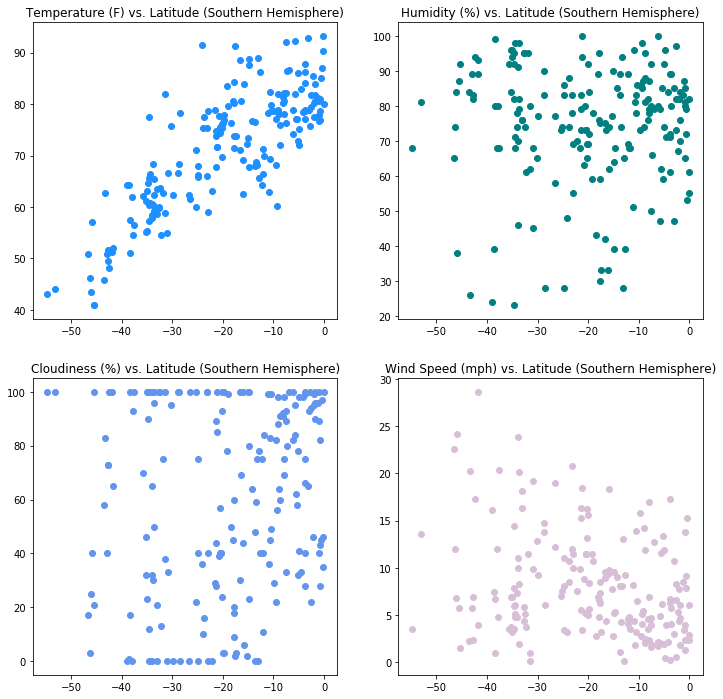

In [80]:
# Run s_plot function to plot Southern Hemisphere
s_plot()